In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import numpy as np


In [2]:
data = pd.read_csv(r"C:\Users\CHARAN\Downloads\50_Startups.csv")

In [3]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
print(data.columns)

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')


In [6]:
data.corr()

ValueError: could not convert string to float: 'New York'

In [ ]:
sns.pairplot(data)

In [7]:
data.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [8]:
rd=data['R&D Spend']
mp=data['Marketing Spend']

In [9]:
import statsmodels.formula.api as smf
model =smf.ols("Profit~mp+rd+Administration",data=data).fit()

In [10]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Mon, 19 Feb 2024   Prob (F-statistic):           4.53e-30
Time:                        13:38:06   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
mp                 0.0272      0.016      1.655      0.105      -0.006       0.060
rd                 0.8057      0.045     17.846      0.000       0.715       0.897
Administration    -0.0268      0.051     -0.526      0.602      -0.130       0.076
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [11]:
model.resid.mean()

1.586158759891987e-11

In [12]:
model.resid_pearson

array([-0.02809938,  0.28544153,  0.96434012,  0.99707064, -0.64464453,
       -0.71375884, -0.21571863, -0.46237091,  0.05091565, -0.5550843 ,
        1.14953951,  0.94078986,  1.34824679,  0.73863854, -1.83550495,
       -1.76749655,  1.0915467 , -0.52230311, -0.51420652,  0.77354686,
        0.19868872, -0.65058642, -0.4716826 , -0.1367612 , -0.52109528,
        0.5596217 , -0.52717275, -1.01813481,  0.17572521, -0.08560602,
        0.05255627, -0.02212834, -0.1704324 , -0.12305531,  0.83115771,
        0.64641399,  1.67043502,  0.03570086,  1.249048  , -0.29496894,
        0.37086567,  0.32454128,  0.095109  ,  1.03895062,  0.06379481,
        1.87118758, -0.72305186, -0.42577084, -1.462033  , -3.63220515])

In [13]:
model.resid

0      -259.422890
1      2635.291768
2      8903.110904
3      9205.289974
4     -5951.574183
5     -6589.660571
6     -1991.586669
7     -4268.763048
8       470.070301
9     -5124.724110
10    10612.933633
11     8685.687039
12    12447.465818
13     6819.358337
14   -16945.996335
15   -16318.119985
16    10077.524599
17    -4822.077208
18    -4747.326806
19     7141.643633
20     1834.360769
21    -6006.431640
22    -4354.731717
23    -1262.625221
24    -4810.926113
25     5166.614935
26    -4867.035350
27    -9399.761457
28     1622.353995
29     -790.343452
30      485.217064
31     -204.296276
32    -1573.488985
33    -1136.087805
34     7673.526259
35     5967.910432
36    15422.015415
37      329.602292
38    11531.629352
39    -2723.251977
40     3423.956009
41     2996.273761
42      878.078179
43     9591.940037
44      588.975084
45    17275.430313
46    -6675.456853
47    -3930.858983
48   -13497.978158
49   -33533.734111
dtype: float64

In [17]:
X1 =data.iloc[:,0:3]
X1

,R&D Spend,Administration,Marketing Spend
0,165349.20,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42
5,131876.90,99814.71,362861.36
6,134615.46,147198.87,127716.82
7,130298.13,145530.06,323876.68
8,120542.52,148718.95,311613.29
9,123334.88,108679.17,304981.62


In [19]:
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
SS_X1 =SS.fit_transform(X1)
SS_X1

array([[ 2.01641149e+00,  5.60752915e-01,  2.15394309e+00],
       [ 1.95586034e+00,  1.08280658e+00,  1.92360040e+00],
       [ 1.75436374e+00, -7.28257028e-01,  1.62652767e+00],
       [ 1.55478369e+00, -9.63646307e-02,  1.42221024e+00],
       [ 1.50493720e+00, -1.07991935e+00,  1.28152771e+00],
       [ 1.27980001e+00, -7.76239071e-01,  1.25421046e+00],
       [ 1.34006641e+00,  9.32147208e-01, -6.88149930e-01],
       [ 1.24505666e+00,  8.71980011e-01,  9.32185978e-01],
       [ 1.03036886e+00,  9.86952101e-01,  8.30886909e-01],
       [ 1.09181921e+00, -4.56640246e-01,  7.76107440e-01],
       [ 6.20398248e-01, -3.87599089e-01,  1.49807267e-01],
       [ 5.93085418e-01, -1.06553960e+00,  3.19833623e-01],
       [ 4.43259872e-01,  2.15449064e-01,  3.20617441e-01],
       [ 4.02077603e-01,  5.10178953e-01,  3.43956788e-01],
       [ 1.01718075e+00,  1.26919939e+00,  3.75742273e-01],
       [ 8.97913123e-01,  4.58678535e-02,  4.19218702e-01],
       [ 9.44411957e-02,  9.11841968e-03

In [23]:
X2 = pd.DataFrame(SS_X1)
X2.columns = list(X1)
X2

,R&D Spend,Administration,Marketing Spend
0,2.016411,0.560753,2.153943
1,1.955860,1.082807,1.923600
2,1.754364,-0.728257,1.626528
3,1.554784,-0.096365,1.422210
4,1.504937,-1.079919,1.281528
5,1.279800,-0.776239,1.254210
6,1.340066,0.932147,-0.688150
7,1.245057,0.871980,0.932186
8,1.030369,0.986952,0.830887
9,1.091819,-0.456640,0.776107


In [24]:
X3 = data.iloc[:,4:5]
X3
SS_X2 = SS.fit_transform(X3)
SS_X2
X4 = pd.DataFrame(SS_X2)
X4.columns = list(X3)
X4

,Profit
0,2.011203
1,1.999430
2,1.980842
3,1.776627
4,1.357740
5,1.127250
6,1.105481
7,1.096210
8,1.007470
9,0.946022


In [27]:
X5 =data.iloc[:,3:4]
X5
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
LE1 =LE.fit_transform(X5)
LE1
X6 =pd.DataFrame(LE1)
X6.columns = list(X5)
X6.columns
X6

C:\Users\CHARAN\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,State
0,2
1,0
2,1
3,2
4,1
5,2
6,0
7,1
8,2
9,0


In [28]:
X7 = pd.concat([X2,X6],axis=1)
X7

,R&D Spend,Administration,Marketing Spend,State
0,2.016411,0.560753,2.153943,2
1,1.955860,1.082807,1.923600,0
2,1.754364,-0.728257,1.626528,1
3,1.554784,-0.096365,1.422210,2
4,1.504937,-1.079919,1.281528,1
5,1.279800,-0.776239,1.254210,2
6,1.340066,0.932147,-0.688150,0
7,1.245057,0.871980,0.932186,1
8,1.030369,0.986952,0.830887,2
9,1.091819,-0.456640,0.776107,0


In [29]:
X8 = pd.concat([X7,X4],axis=1)
X8.corr()

,R&D Spend,Administration,Marketing Spend,State,Profit
R&D Spend,1.000000,0.241955,0.724248,0.104685,0.972900
Administration,0.241955,1.000000,-0.032154,0.011847,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.077670,0.747766
State,0.104685,0.011847,0.077670,1.000000,0.101796
Profit,0.972900,0.200717,0.747766,0.101796,1.000000


In [31]:
X = pd.concat([X2,X6],axis =1)
X
Y = X4
Y

,Profit
0,2.011203
1,1.999430
2,1.980842
3,1.776627
4,1.357740
5,1.127250
6,1.105481
7,1.096210
8,1.007470
9,0.946022


In [32]:
Y = X4["Profit"]
X = X7[["R&D Spend"]]
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X,Y)
LR.intercept_
LR.coef_
Y_pred = LR.predict(X)
Y_pred

array([ 1.96176768,  1.90285743,  1.7068213 ,  1.51264978,  1.46415411,
        1.24511803,  1.30375123,  1.2113162 ,  1.00244634,  1.06223142,
        0.60358574,  0.57701308,  0.43124774,  0.39118149,  0.98961562,
        0.8735801 ,  0.09188188,  0.44823483,  0.38597388,  0.27186891,
        0.05421594,  0.09993984,  0.0058438 , -0.13250975,  0.07113323,
       -0.19391043,  0.03441169, -0.03455645, -0.16421851, -0.17376833,
       -0.25108067, -0.26945279, -0.22079847, -0.39025852, -0.58440392,
       -0.593226  , -0.96469906, -0.63484899, -1.14527659, -0.75285019,
       -0.96275994, -0.98120293, -1.07223901, -1.24641552, -1.10356625,
       -1.55698161, -1.55023246, -1.57839677, -1.56679135, -1.57839677])

In [33]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y,Y_pred)
print("Mean Squared Error:",mse.round(3))
print("Root Mean Squared Error:",np.sqrt(mse).round(3))
from sklearn.metrics import r2_score
R2  = r2_score(Y,Y_pred)
R2
print("r2:",R2.round(3))

Mean Squared Error: 0.053
Root Mean Squared Error: 0.231
r2: 0.947


In [35]:
Y = X7["R&D Spend"]
X = X7[["State"]]
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X,Y)
Y_pred = LR.predict(X)
r2 =r2_score(Y,Y_pred)
VIF =1/(1-r2)
print("Variance Influence Factor:",VIF)

Variance Influence Factor: 1.0110804010836976


In [38]:
Y = X7["State"]
X = X7[["Administration"]]
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X,Y)
Y_pred = LR.predict(X)
r2 = r2_score(Y,Y_pred)
VIF =1/(1-r2)
print("Variance Influence Factor:",VIF)

Variance Influence Factor: 1.0001403759001628


In [39]:
Y = X7["Administration"]
X = X7[["Marketing Spend"]]
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X,Y)
Y_pred = LR.predict(X)
r2 = r2_score(Y,Y_pred)
VIF = 1/(1-r2)
print("Variance Influence Factor: ",VIF)

Variance Influence Factor:  1.0010349416824806


In [40]:
Y = X7["State"]
X = X7[["Marketing Spend"]]
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X,Y)
Y_pred = LR.predict(X)
r2 = r2_score(Y,Y_pred)
VIF = 1/(1-r2)
print("Variance Influence Factor: ",VIF)

Variance Influence Factor:  1.006069180313524


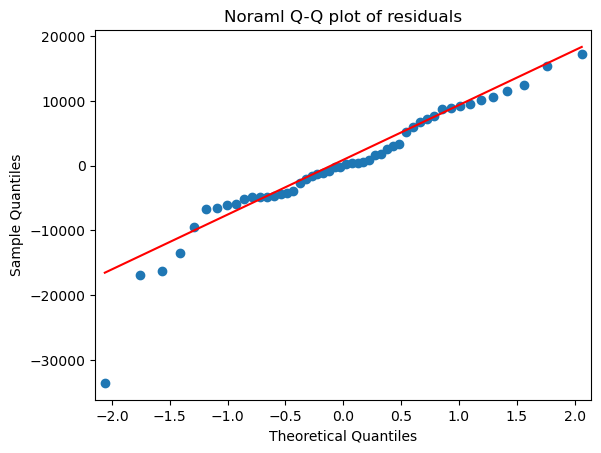

In [41]:
import statsmodels.api  as sm
qqplot = sm.qqplot(model.resid,line='q')
plt.title("Noraml Q-Q plot of residuals")
plt.show()